<a href="https://colab.research.google.com/github/Yehan-Ranasinghe/AI-Powered-Stock-Price-Predictor/blob/main/AI_Powered_Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
# Step 1: Fetch Stock Data
def get_stock_data(ticker, period='1y'):
    stock = yf.Ticker(ticker)
    df = stock.history(period=period)
    return df

In [11]:
# Step 2: Preprocess Data
def prepare_data(df):
    df['Date'] = df.index
    df['Days'] = (df['Date'] - df['Date'].min()).dt.days  # Convert dates to numerical values
    return df[['Days', 'Close']]

In [12]:
# Step 3: Train the Model
def train_model(df):
    X = df[['Days']]
    y = df['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    print(f"MAE: {mean_absolute_error(y_test, predictions)}")
    print(f"MSE: {mean_squared_error(y_test, predictions)}")
    return model


In [13]:
# Step 4: Predict Future Prices
def predict_future(model, days_ahead=30):
    future_days = np.array([[df['Days'].max() + i] for i in range(1, days_ahead+1)])
    future_prices = model.predict(future_days)
    return future_days.flatten(), future_prices

In [14]:
# Step 5: Visualize Predictions
def plot_predictions(df, model):
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df['Days'], y=df['Close'], label='Actual Prices', color='blue')
    sns.lineplot(x=df['Days'], y=model.predict(df[['Days']]), label='Predicted Prices', color='red')
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.title("Stock Price Prediction using Linear Regression")
    plt.legend()
    plt.show()

MAE: 8.970752856235755
MSE: 125.75427819444265


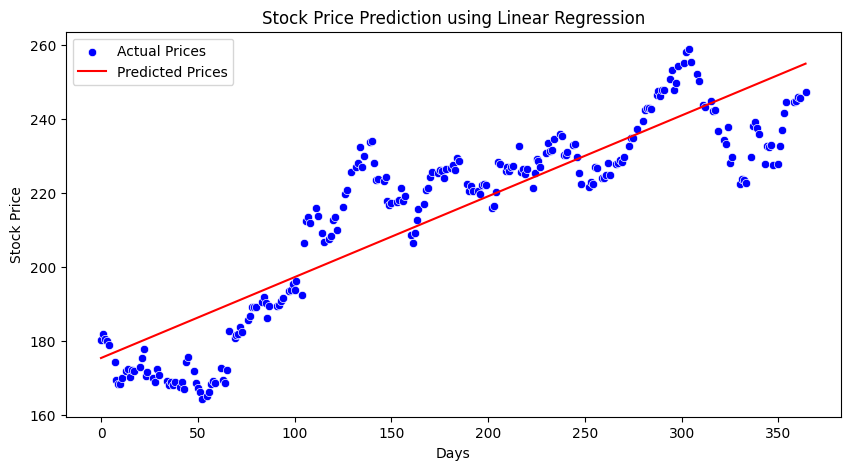

Future Predictions:
Day 365: $255.06
Day 366: $255.28
Day 367: $255.50
Day 368: $255.71
Day 369: $255.93
Day 370: $256.15
Day 371: $256.37
Day 372: $256.59
Day 373: $256.81
Day 374: $257.02
Day 375: $257.24
Day 376: $257.46
Day 377: $257.68
Day 378: $257.90
Day 379: $258.12
Day 380: $258.33
Day 381: $258.55
Day 382: $258.77
Day 383: $258.99
Day 384: $259.21
Day 385: $259.43
Day 386: $259.64
Day 387: $259.86
Day 388: $260.08
Day 389: $260.30
Day 390: $260.52
Day 391: $260.74
Day 392: $260.96
Day 393: $261.17
Day 394: $261.39


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
# Running the Program
ticker = 'AAPL'  # Change to any stock symbol
df = get_stock_data(ticker)
df = prepare_data(df)
model = train_model(df)
plot_predictions(df, model)

# Predict Future Stock Prices
future_days, future_prices = predict_future(model)
print("Future Predictions:")
for day, price in zip(future_days, future_prices):
    print(f"Day {day}: ${price:.2f}")
